In [264]:
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as st

In [280]:
np.random.seed(0)

In [281]:
pop, ignore_classes = make_gaussian_quantiles(n_samples=1000, n_features = 2, cov=1, n_classes=1, random_state=0)

In [282]:
rand1 = np.random.choice(range(1000), 30, replace=False)
rand2 = np.random.choice(range(1000), 30, replace=False)

sample1_x = pop[:,0][rand1]
sample1_y = pop[:,1][rand1]
sample2_x = pop[:,0][rand2]
sample2_y = pop[:,1][rand2]

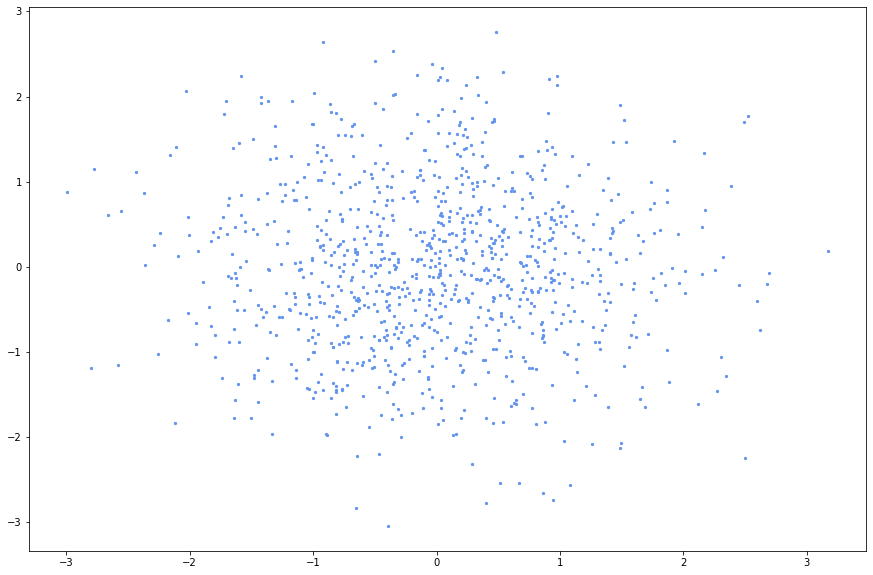

In [283]:
plt.figure(figsize=(15,10))
plt.scatter(pop[:,0], pop[:,1], s=5, color='cornflowerblue')
plt.show()

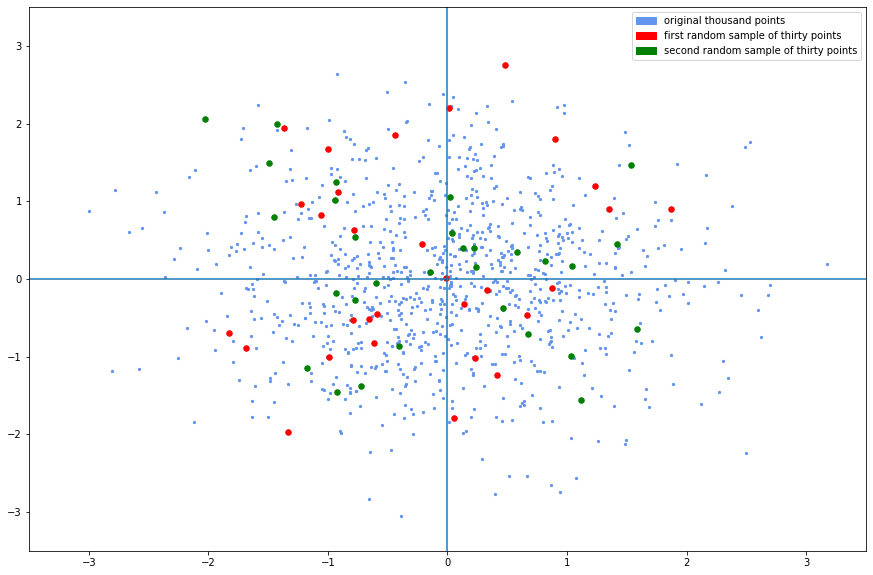

In [284]:
plt.figure(figsize=(15,10))

plt.scatter(pop[:,0], pop[:,1], s=5, color='cornflowerblue')
plt.scatter(sample1_x, sample1_y, s=30, color='red')
plt.scatter(sample2_x, sample2_y, s=30, color='green')

blue_patch = mpatches.Patch(color='cornflowerblue', label='original thousand points')
red_patch = mpatches.Patch(color='red', label='first random sample of thirty points')
green_patch = mpatches.Patch(color='green', label='second random sample of thirty points')
plt.legend(handles=[blue_patch, red_patch, green_patch])

plt.axvline(0)
plt.axline((0,0), slope=0)
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.show()

In [285]:
np.mean(sample1_x), np.mean(sample2_x), np.std(sample1_x), np.std(sample2_x)

(-0.23125519729065308,
 -0.12665204081766268,
 0.9254871943807469,
 0.9862655786847915)

In [286]:
# formula for two-sample hypothesis test with mean

def ab_test(sample_A, sample_B, p_value=.05):
    mean_A = np.mean(sample_A)
    mean_B = np.mean(sample_B)
    
    std_A = np.std(sample_A)
    std_B = np.std(sample_B)
    
    standard_error = np.sqrt((std_A**2)/len(sample_A) + (std_B**2)/len(sample_B))
    difference = mean_A - mean_B
    
    test_statistic = difference/standard_error
    
    crit = st.norm.ppf(p_value/2)*-1
    reject_status = 'Reject Null Hypothesis' if crit < test_statistic else 'Fail to Reject Null Hypothesis'
    
    return 'Test Statistic: ', test_statistic, 'Critical Value: ', crit, reject_status

In [287]:
ab_test(sample1_x, sample2_x, .05)

('Test Statistic: ',
 -0.4236130395708238,
 'Critical Value: ',
 1.9599639845400545,
 'Fail to Reject Null Hypothesis')

In [288]:
test_statistic = ab_test(sample1_x, sample2_x, .05)[1]
probability = st.norm.sf(test_statistic)*2 if test_statistic >= 0 else st.norm.cdf(test_statistic)*2
print(round(probability*100,3), '% chance of obtaining these two sample means by chance')

67.185 % chance of obtaining these two sample means by chance


# P-value of .01

In [289]:
n = 1
while ab_test(sample1_x, sample2_x, .001)[-1] != 'Reject Null Hypothesis':
    rand1 = np.random.choice(range(1000), 30, replace=False)
    rand2 = np.random.choice(range(1000), 30, replace=False)

    sample1_x = pop[:,0][rand1]
    sample1_y = pop[:,1][rand1]
    sample2_x = pop[:,0][rand2]
    sample2_y = pop[:,1][rand2]
    
    n += 1
print('number of iterations required to reach p-value: ', n)
ab_test(sample1_x, sample2_x, .001)

number of iterations required to reach p-value:  672


('Test Statistic: ',
 3.318082017198333,
 'Critical Value: ',
 3.2905267314918945,
 'Reject Null Hypothesis')

In [290]:
test_statistic = ab_test(sample1_x, sample2_x, .001)[1]
probability = st.norm.sf(test_statistic)*2 if test_statistic >= 0 else st.norm.cdf(test_statistic)*2
print(round(probability*100,3), '% chance of obtaining these two samples by chance')

0.091 % chance of obtaining these two samples by chance


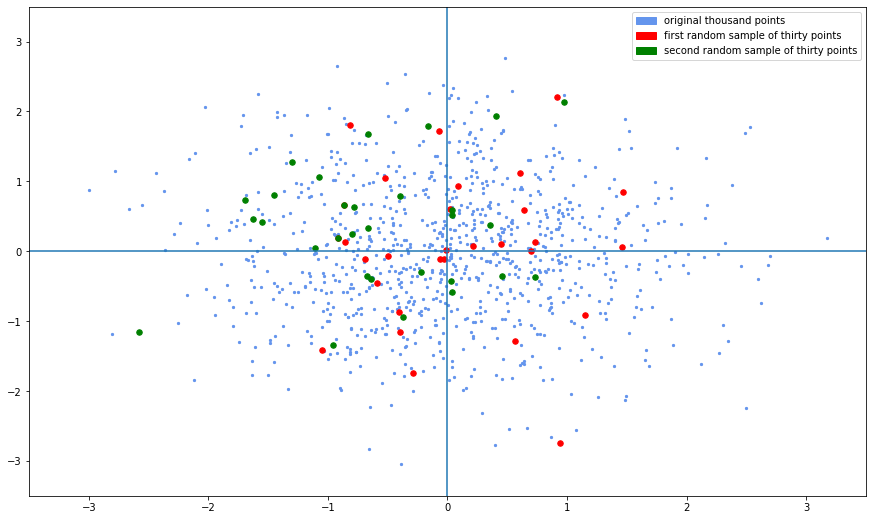

In [291]:
plt.figure(figsize=(15,9))

plt.scatter(pop[:,0], pop[:,1], s=5, color='cornflowerblue')
plt.scatter(sample1_x, sample1_y, s=30, color='red')
plt.scatter(sample2_x, sample2_y, s=30, color='green')

blue_patch = mpatches.Patch(color='cornflowerblue', label='original thousand points')
red_patch = mpatches.Patch(color='red', label='first random sample of thirty points')
green_patch = mpatches.Patch(color='green', label='second random sample of thirty points')
plt.legend(handles=[blue_patch, red_patch, green_patch])

plt.axvline(0)
plt.axline((0,0), slope=0)
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.show()

# P-value of .0001

In [292]:
n = 1
while ab_test(sample1_x, sample2_x, .0001)[-1] != 'Reject Null Hypothesis':
    rand1 = np.random.choice(range(1000), 30, replace=False)
    rand2 = np.random.choice(range(1000), 30, replace=False)

    sample1_x = pop[:,0][rand1]
    sample1_y = pop[:,1][rand1]
    sample2_x = pop[:,0][rand2]
    sample2_y = pop[:,1][rand2]
    
    n += 1
print('number of iterations required to reach p-value: ', n)
ab_test(sample1_x, sample2_x, .0001)

number of iterations required to reach p-value:  25522


('Test Statistic: ',
 4.28096133653802,
 'Critical Value: ',
 3.890591886413094,
 'Reject Null Hypothesis')

In [293]:
test_statistic = ab_test(sample1_x, sample2_x, .0001)[1]
probability = st.norm.sf(test_statistic)*2 if test_statistic >= 0 else st.norm.cdf(test_statistic)*2
print(round(probability*100,3), '% chance of obtaining these two samples by chance')

0.002 % chance of obtaining these two samples by chance


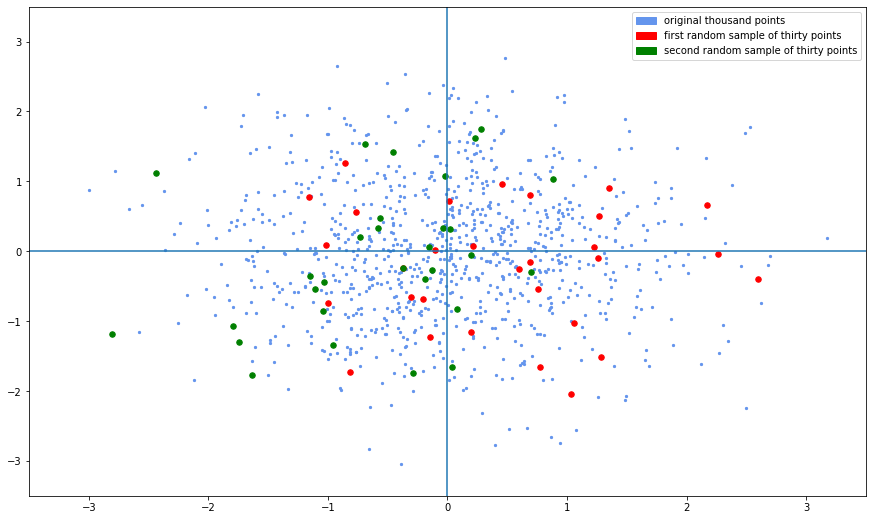

In [294]:
plt.figure(figsize=(15,9))

plt.scatter(pop[:,0], pop[:,1], s=5, color='cornflowerblue')
plt.scatter(sample1_x, sample1_y, s=30, color='red')
plt.scatter(sample2_x, sample2_y, s=30, color='green')

blue_patch = mpatches.Patch(color='cornflowerblue', label='original thousand points')
red_patch = mpatches.Patch(color='red', label='first random sample of thirty points')
green_patch = mpatches.Patch(color='green', label='second random sample of thirty points')
plt.legend(handles=[blue_patch, red_patch, green_patch])

plt.axvline(0)
plt.axline((0,0), slope=0)
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.show()